<a href="https://colab.research.google.com/github/aminhm00/Texture_segmentation/blob/main/Histogram_Features_Kmeans_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

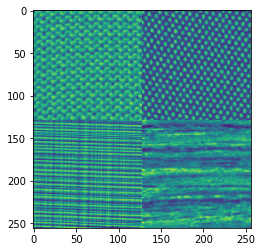

In [2]:
imageRGB1= cv2.imread("4TEXT.TIF")
imageGRAY1 = cv2.cvtColor(imageRGB1,cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY1)

In [3]:
mean = int(imageGRAY1.mean())
im_g_border = cv2.copyMakeBorder(imageGRAY1, top=10 , bottom=10 , left=10 , right=10, borderType=cv2.BORDER_CONSTANT, value=mean)
im_g_border.shape

(276, 276)

In [4]:
from scipy import stats
l , c = im_g_border.shape
descriptor = np.zeros((256,256,4))
for i in range(10,l-10):
    for j in range(10,c-10):
        m =  int(imageGRAY1[i-10:i+10,j-10:j+10].flatten().mean())
        e =  int(imageGRAY1[i-10:i+10,j-10:j+10].flatten().std())
        skewness = stats.skew(imageGRAY1[i-10:i+10,j-10:j+10].flatten())
        entropy = stats.entropy(imageGRAY1[i-10:i+10,j-10:j+10].flatten())
        descriptor[i-10,j-10] = [m,e,skewness,entropy]
descriptor.shape

(256, 256, 4)

In [5]:
vectorized_descriptors = descriptor.reshape(-1,4)
vectorized_descriptors.shape

(65536, 4)

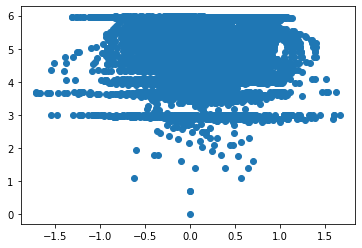

In [6]:
plt.scatter(vectorized_descriptors[:,2],vectorized_descriptors[:,3])

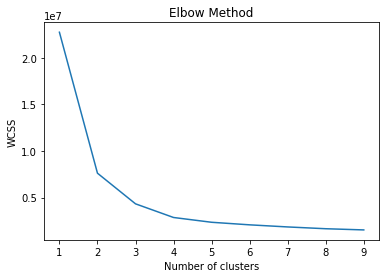

In [7]:
#elbow method to insure that we got 4 cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter=50,n_init=10 ,random_state=0)
    kmeans.fit(vectorized_descriptors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h1>Segmentation using Kmeans</h1>

In [8]:
model = KMeans(n_clusters = 5 , init='k-means++', max_iter=100, n_init=10, random_state=0)
clusters_pred = model.fit_predict(vectorized_descriptors)

In [9]:
set(clusters_pred)

{0, 1, 2, 3, 4}

In [10]:
cluster_df = pd.concat([pd.DataFrame(imageGRAY1.flatten(),columns=['gray']),
                             pd.DataFrame(clusters_pred, columns=['cluster'])], axis=1)

cluster_df.loc[cluster_df.cluster == 0 ,"gray"]=0
cluster_df.loc[cluster_df.cluster == 1 ,"gray"]=70
cluster_df.loc[cluster_df.cluster == 2 ,"gray"]=140
cluster_df.loc[cluster_df.cluster == 3 ,"gray"]=255



final_texture = cluster_df[cluster_df.columns[:-1]].values
final_texture

array([[ 70],
       [ 70],
       [ 70],
       ...,
       [140],
       [140],
       [140]], dtype=uint8)

In [12]:
final_texture = final_texture.reshape(imageGRAY1.shape)

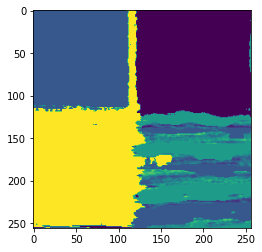

In [13]:
plt.imshow(final_texture)

<h1>Segmentation using GMM</h1>

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)#,covariance_type='full'
clusters_pred2 = gmm.fit_predict(vectorized_descriptors)

In [15]:
cluster_df2 = pd.concat([pd.DataFrame(imageGRAY1.flatten(),columns=['gray']),
                             pd.DataFrame(clusters_pred2, columns=['cluster'])], axis=1)

cluster_df2.loc[cluster_df2.cluster == 0 ,"gray"]=0
cluster_df2.loc[cluster_df2.cluster == 1 ,"gray"]=70
cluster_df2.loc[cluster_df2.cluster == 2 ,"gray"]=140
cluster_df2.loc[cluster_df2.cluster == 3 ,"gray"]=255



final_texture2 = cluster_df2[cluster_df2.columns[:-1]].values
final_texture2.shape

(65536, 1)

In [17]:
final_texture2 = final_texture2.reshape(imageGRAY1.shape)

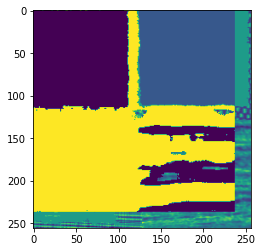

In [18]:
plt.imshow(final_texture2)